<b>Part 2</b>

In [200]:
library(igraph)
library(Matrix)
library(pracma)

<b>Part 2.1 A</b>

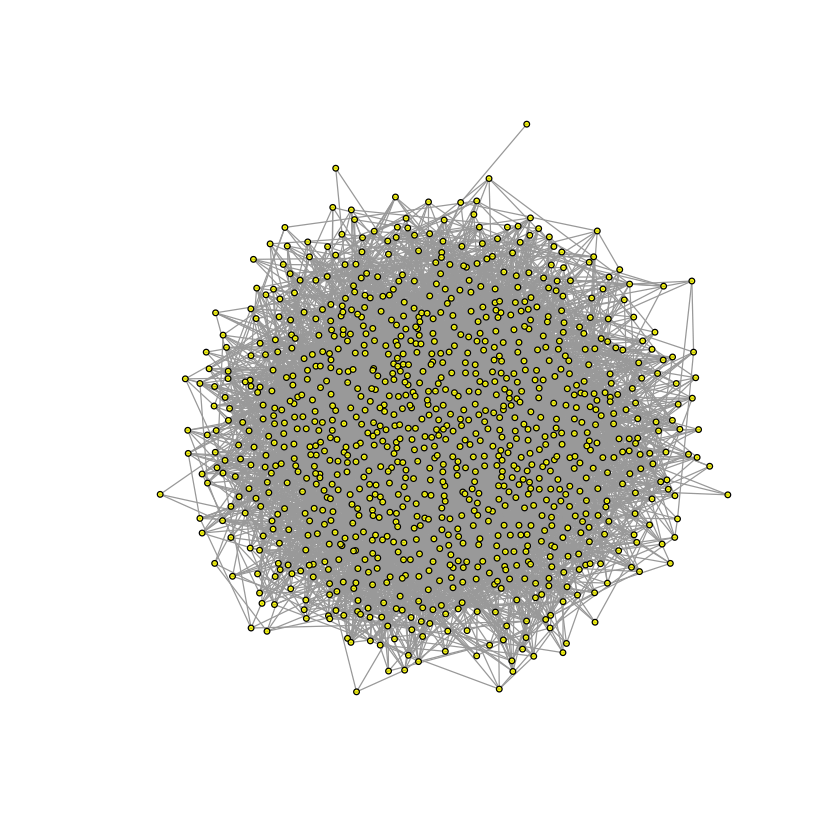

In [246]:
set.seed(0)
p =0.01
g1 = erdos.renyi.game(1000, p, directed=F)
plot(g1,vertex.size=2, vertex.label.cex=0.1,vertex.color="yellow")

<b>Part 2.1 B</b>

In [202]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [203]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [204]:
random_walk_record = 
function (num_nodes, num_steps, g1, transition_matrix, sample)
{
    avg_distance = numeric()
    standard_deviation = numeric()
    deg_random_walk_end = numeric()
    for (j in 1:num_steps){
        distance_vec = numeric()
        for (i in 1:num_nodes) {
            start = i
            end = random_walk(g1, j, start, transition_matrix)
            distance = shortest.paths(g1, start, end)
            if (distance == Inf) {
                distance = 0
            }
            distance_vec = c(distance_vec, distance)

            if(j == num_steps){
                deg_random_walk_end = c(deg_random_walk_end, degree(g1, v = end))
            }
        }
        avg_distance = c(avg_distance, mean(distance_vec))
        standard_deviation = c(standard_deviation, sqrt(mean((distance_vec - mean(distance_vec))**2)))
        }
        plot(avg_distance, typ='l', main = paste("Average Distance vs. t =", num_nodes, "nodes"), xlab = "Steps", ylab = "Average Distance")
        plot(standard_deviation, typ='l', main = paste("Average Standard Deviation vs. t =", num_nodes, "nodes"), xlab = "Steps", ylab = "Average Standard Deviation")
        return(deg_random_walk_end)
}

In [255]:
is.connected(g1)

[1] TRUE

In [205]:
transition_matrix_g1 = create_transition_matrix(g1)

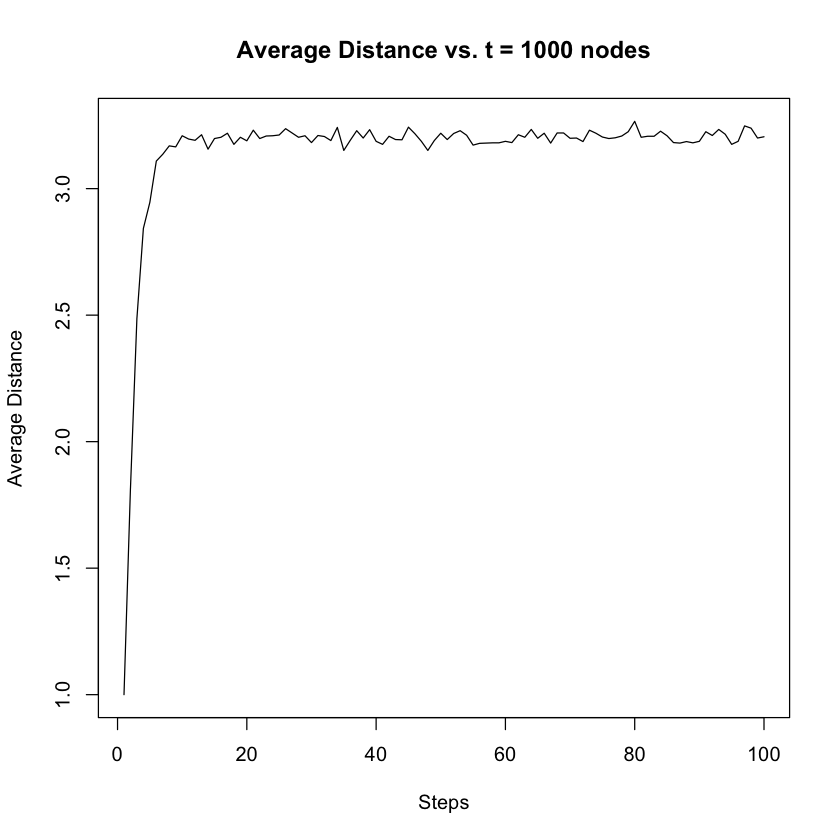

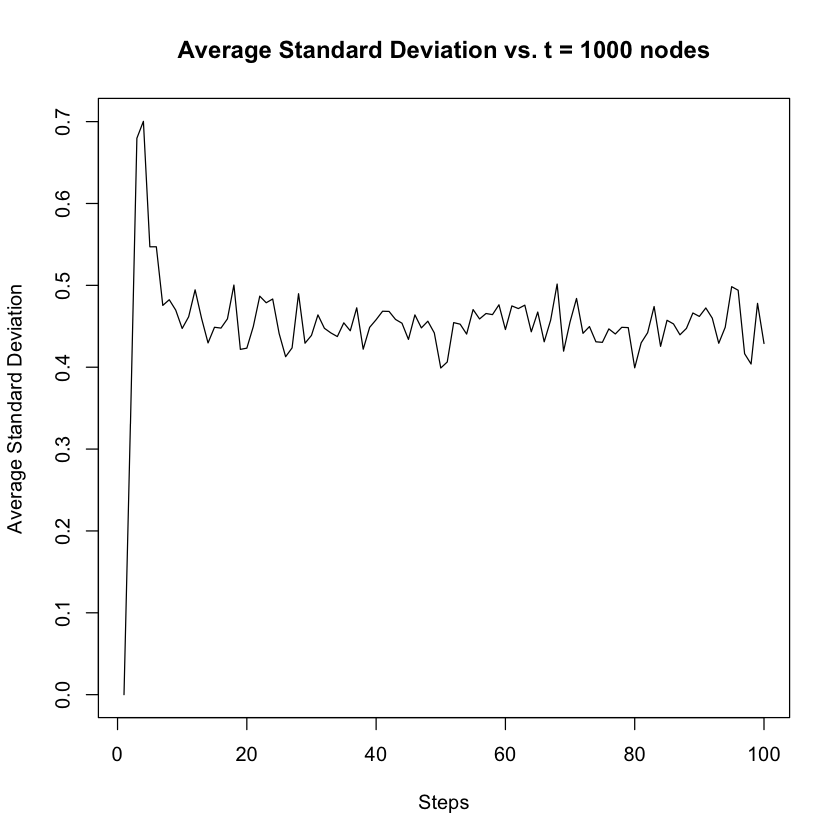

In [221]:
deg_random_walk_end = random_walk_record(1000, 100, g1,transition_matrix_g1)

<b>Part 2.1 C</b>

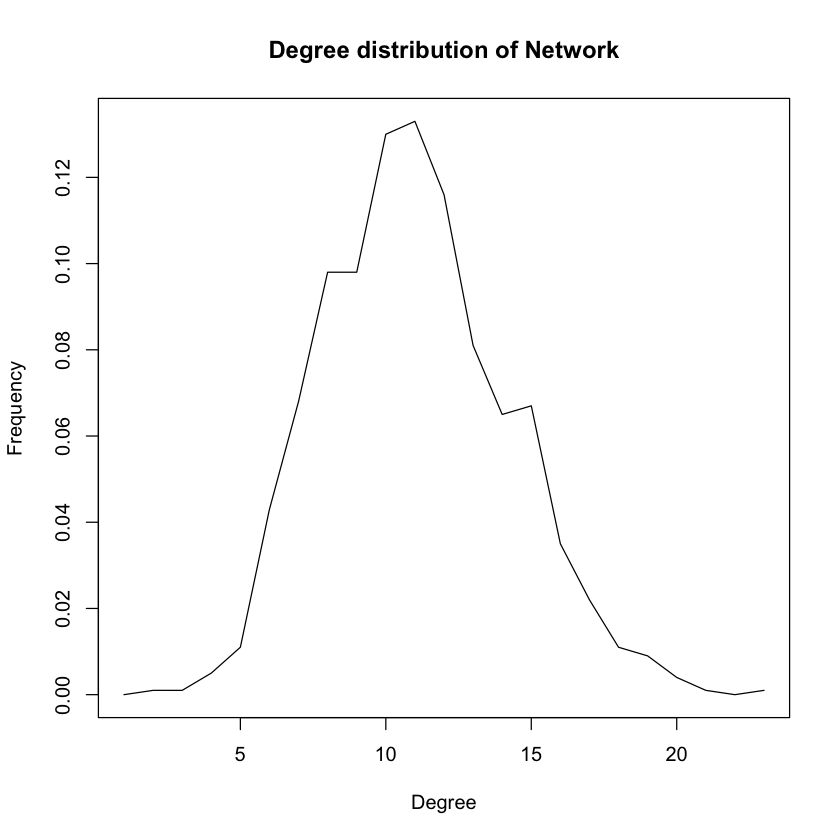

In [207]:
plot(degree.distribution(g1),typ='l',main="Degree distribution of Network",xlab="Degree",ylab="Frequency")

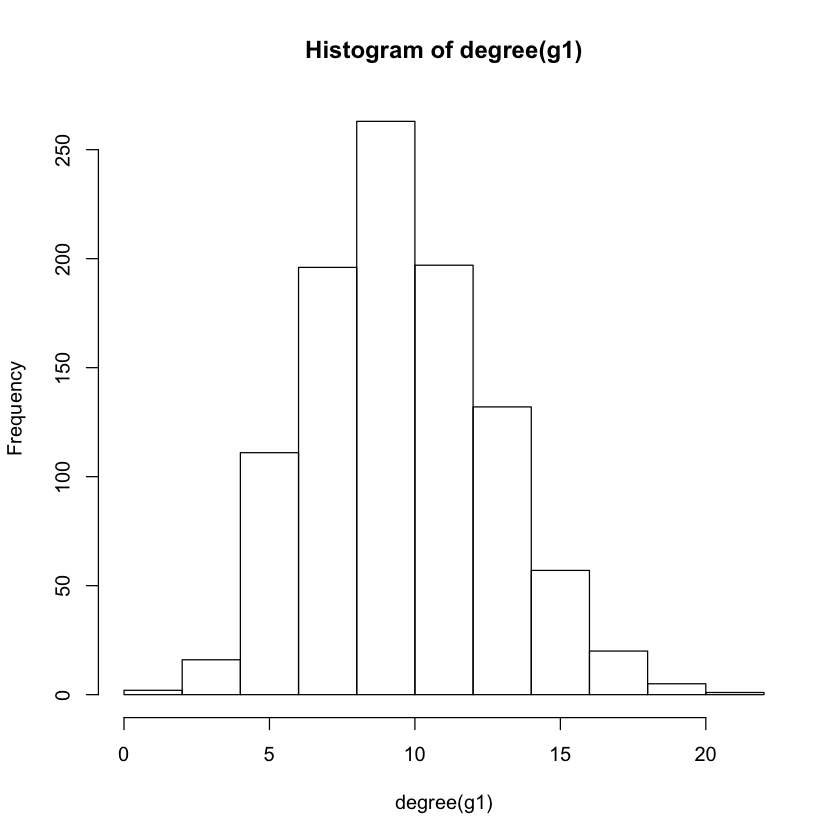

In [208]:
hist(degree(g1))

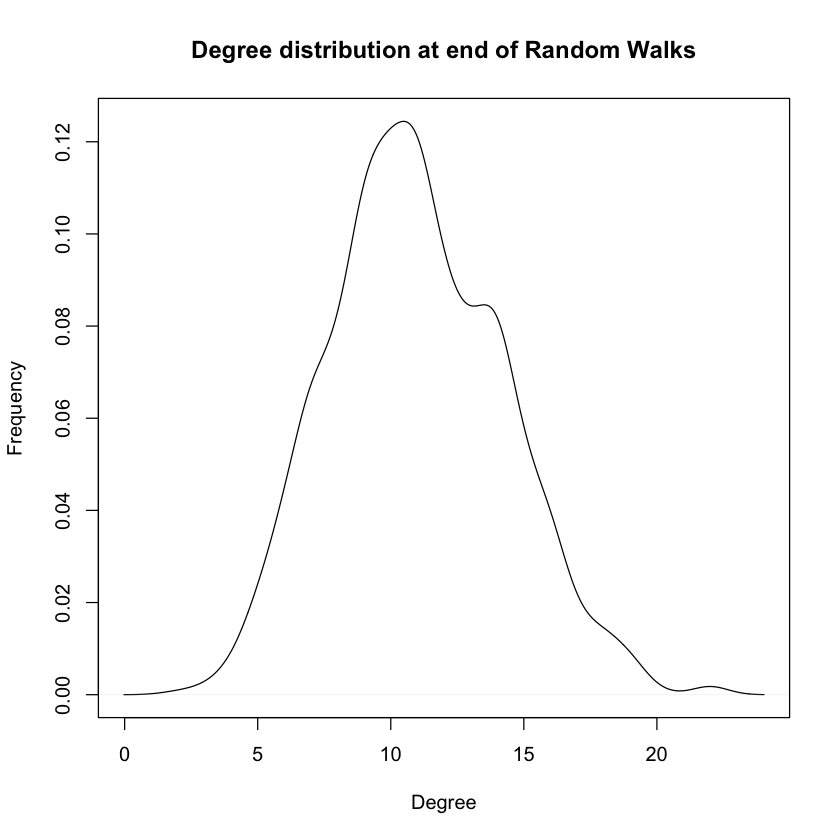

In [300]:
d = density(deg_random_walk_end)
plot(d,main="Degree distribution at end of Random Walks",xlab="Degree",ylab="Frequency")

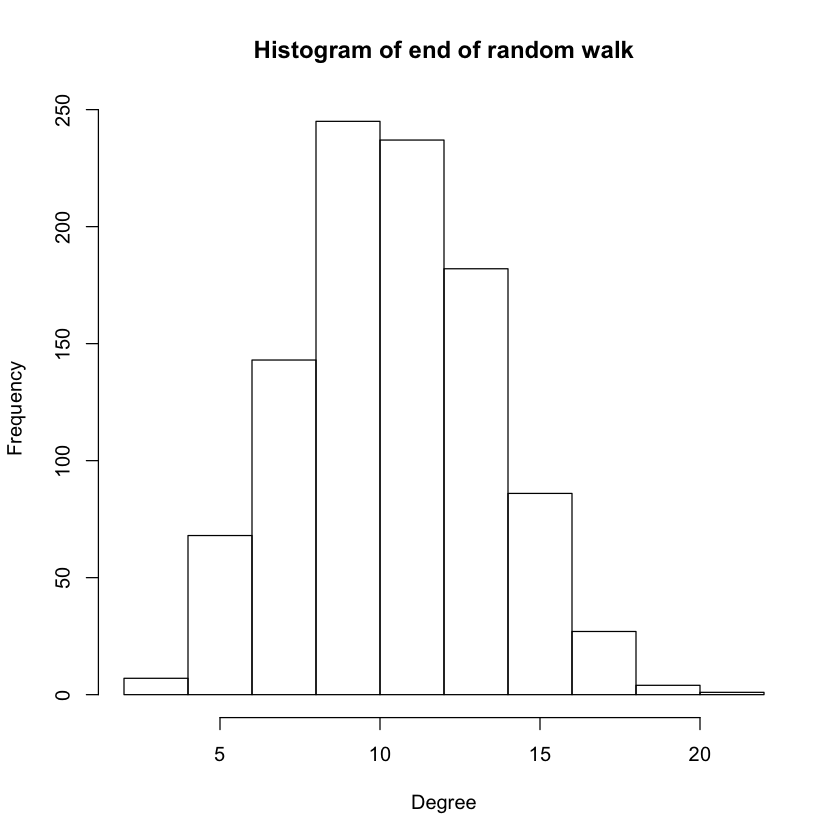

In [209]:
hist(deg_random_walk_end,main="Histogram of end of random walk",xlab="Degree",ylab="Frequency")

<b>Part 2.1 D</b>

In [210]:
find_gcc = function (g){
    if(is.connected(g) == TRUE){
        return (g)
    }
    else{
        g.components  = clusters(g)
        print(g.components$csize)
        
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        return (g.giant)
    }
}

In [275]:
set.seed(0)
g2 = erdos.renyi.game(100, p, directed=F)
g2_gcc=find_gcc(g2)

 [1]  1  7 22  3  7  1  2  1  9  1  3  7  1  1  1  1  1  1  1  1  1  1  1  1  1
[26]  1  1  1  1  1  1  2  1  3  1  1  1  1  1  1  1  1  1  1  1


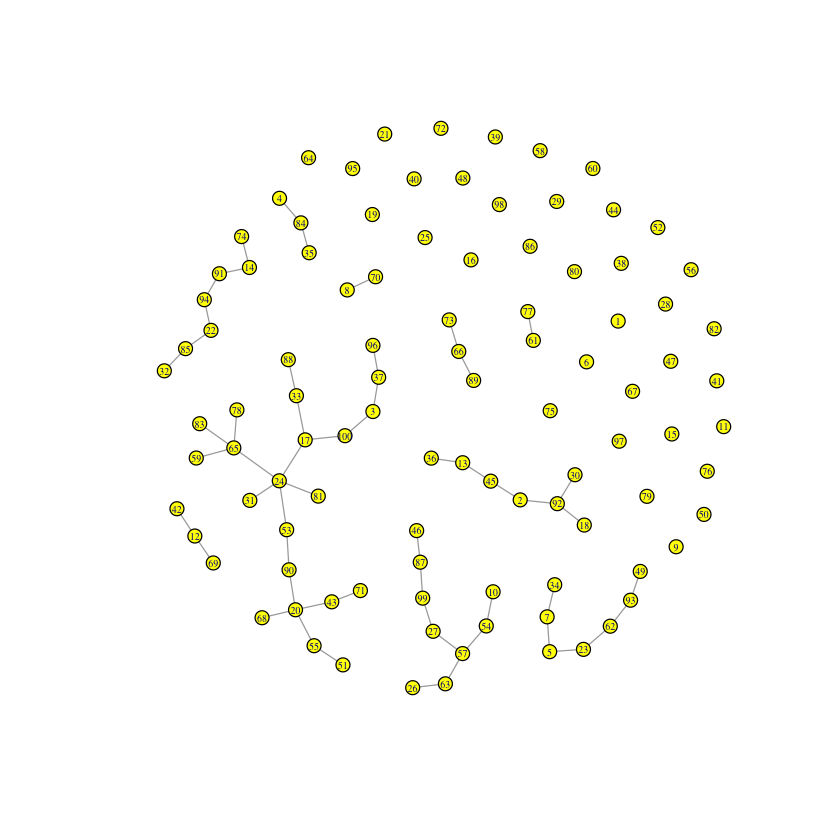

In [276]:
plot(g2,vertex.size=5, vertex.label.cex=0.5,vertex.color="yellow")

In [280]:
transition_matrix_g2 = create_transition_matrix(g2)

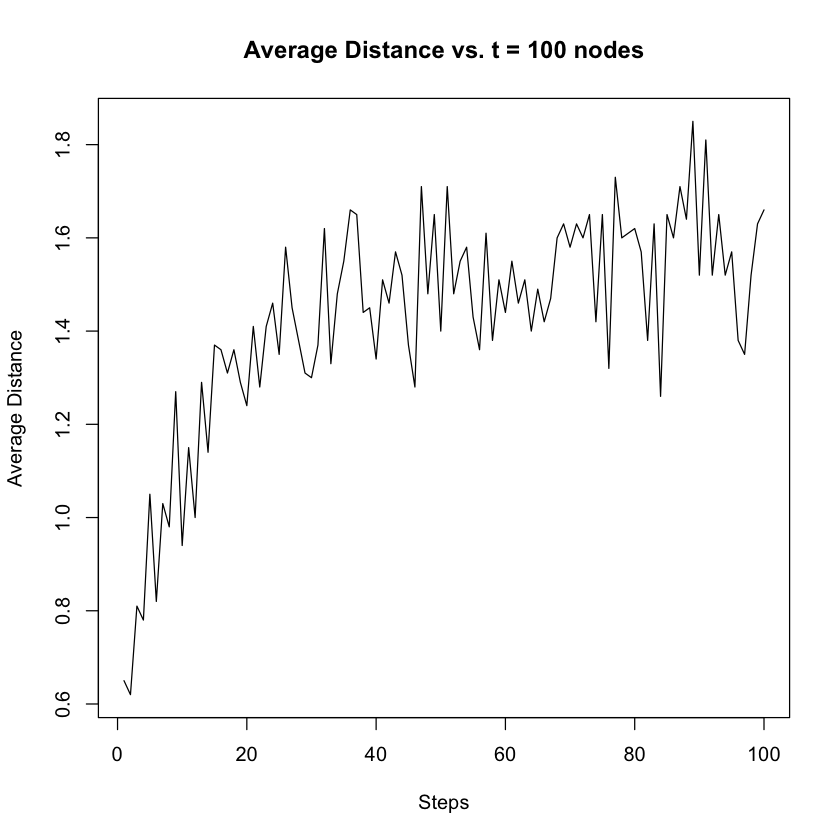

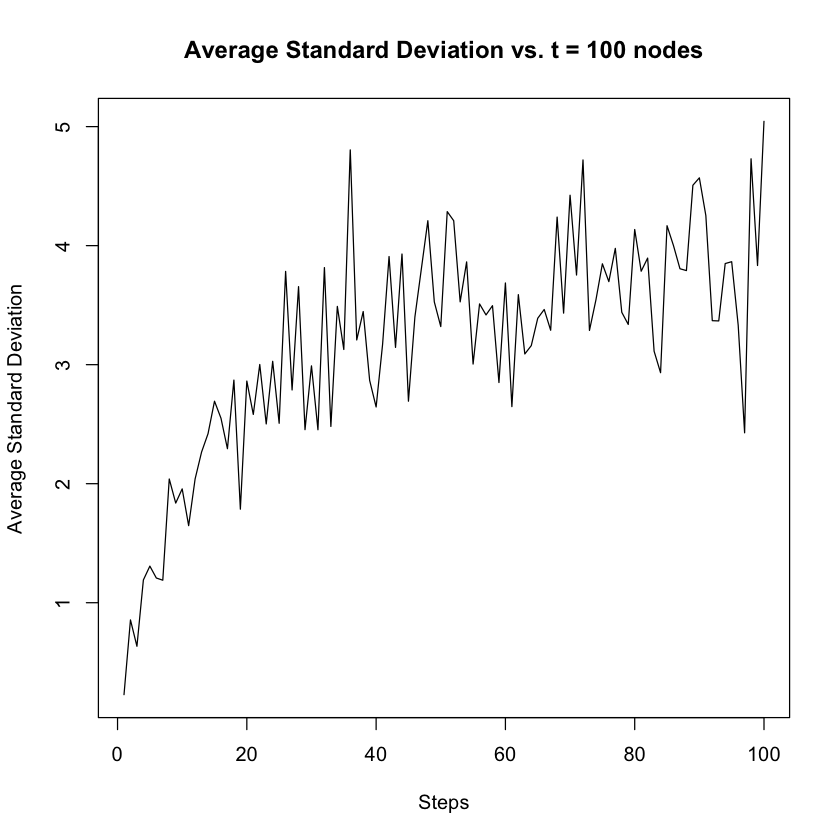

In [281]:
deg_random_walk_end2 = random_walk_record(100, 100, g2, transition_matrix_g2)

In [283]:
transition_matrix_g2cc = create_transition_matrix(g2_gcc)

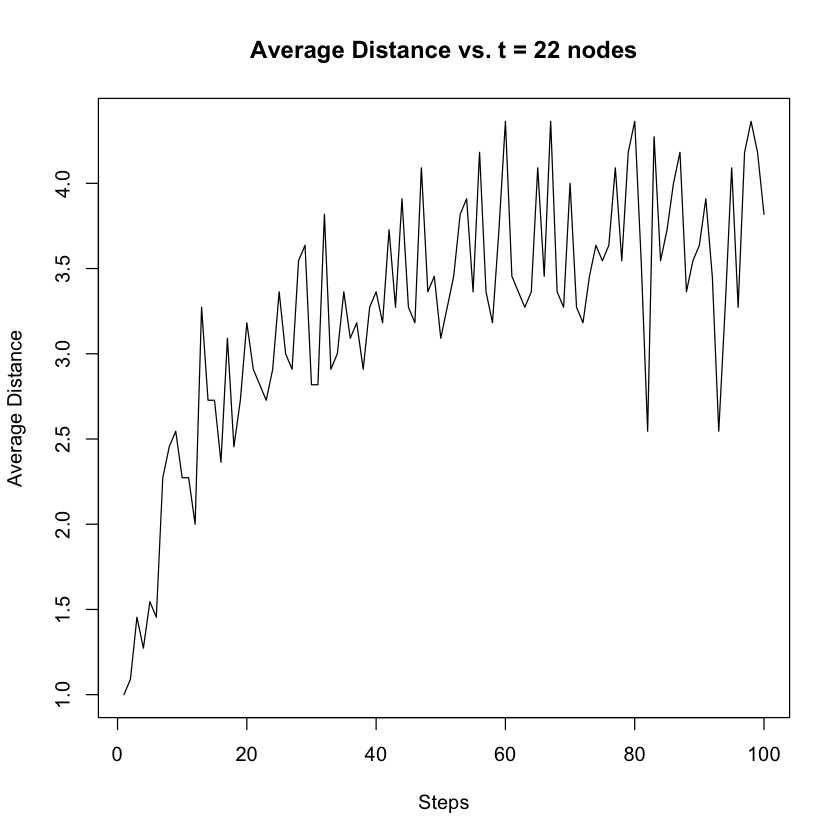

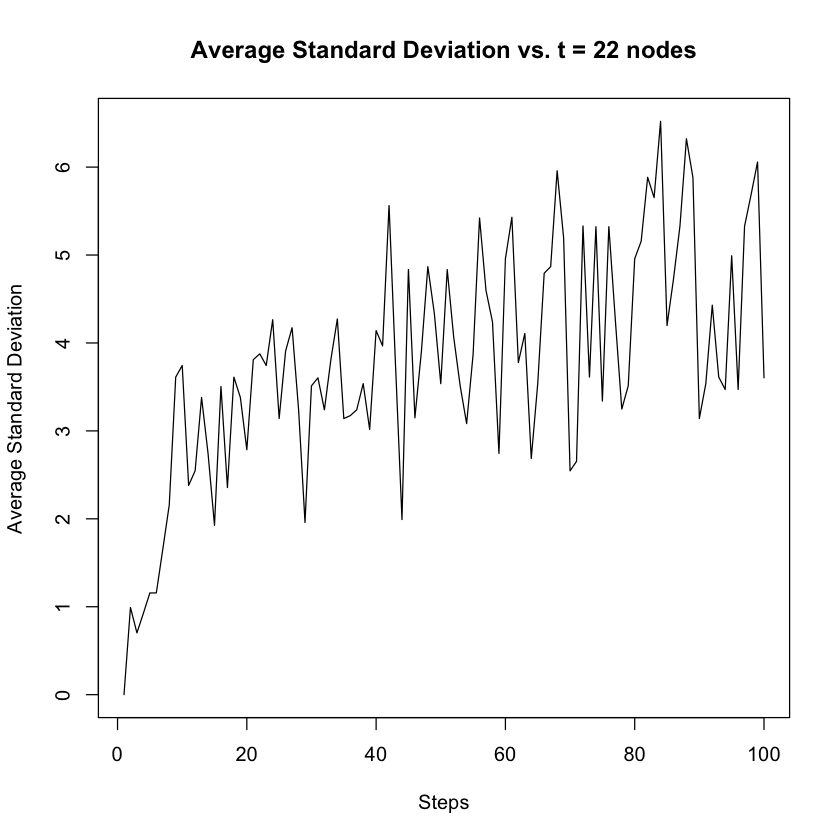

In [284]:
deg_random_walk_end2gcc = random_walk_record(22, 100, g2_gcc, transition_matrix_g2cc)

In [285]:
set.seed(0)
g3 = erdos.renyi.game(10000, p, directed=F)

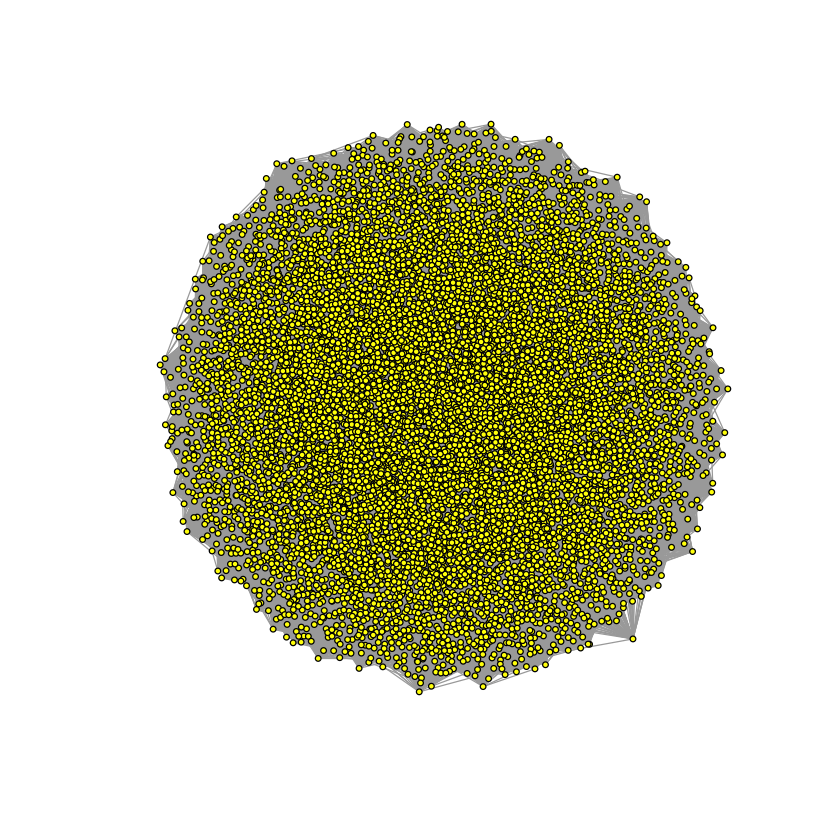

In [247]:
plot(g3,vertex.size=2, vertex.label.cex=0.01,vertex.color="yellow")

In [311]:
is.connected(g3)

[1] TRUE

In [218]:
transition_matrix_g3 = create_transition_matrix(g3)

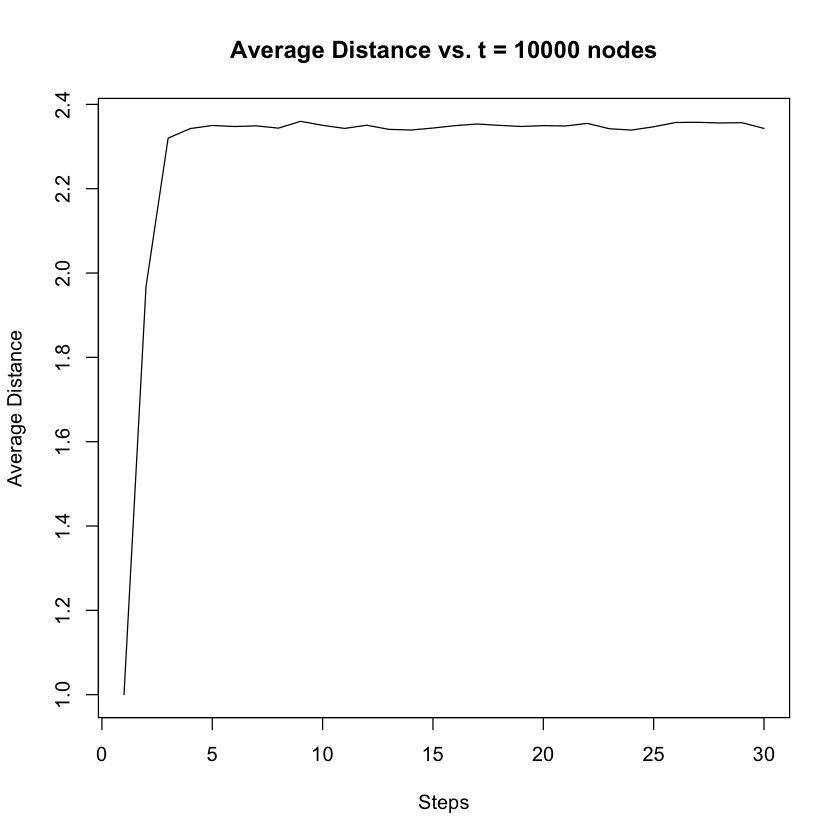

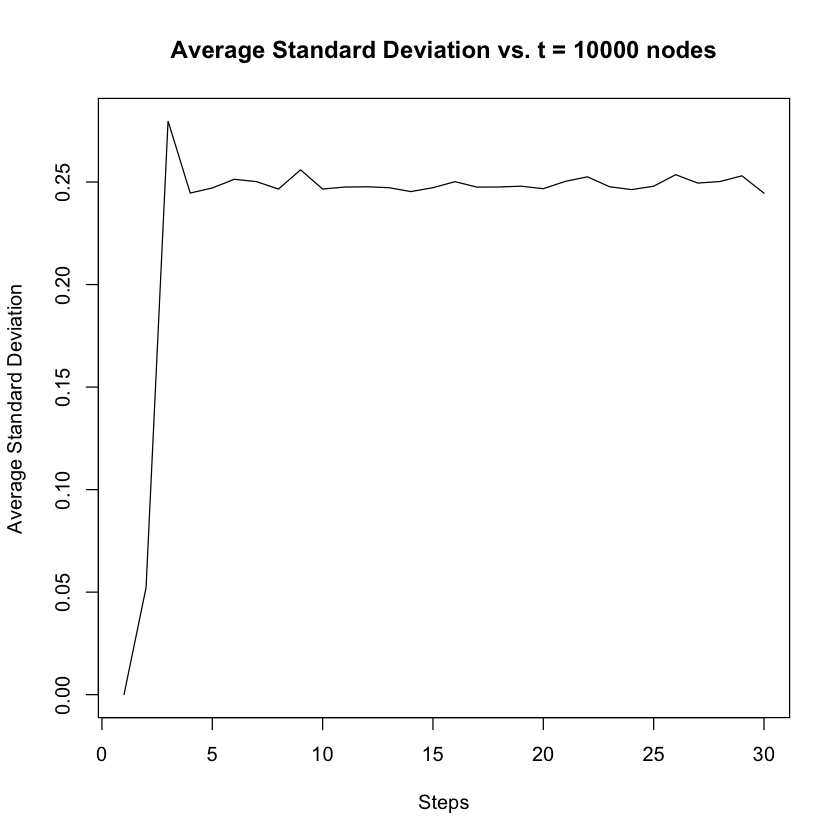

In [220]:
deg_random_walk_end3 = random_walk_record(10000, 30, g3, transition_matrix_g3)

In [313]:
diameter(g1)
diameter(g2)
diameter(g2_gcc)
diameter(g3)

[1] 6

[1] 10

[1] 10

[1] 3

<b>Part 2.2 A</b>

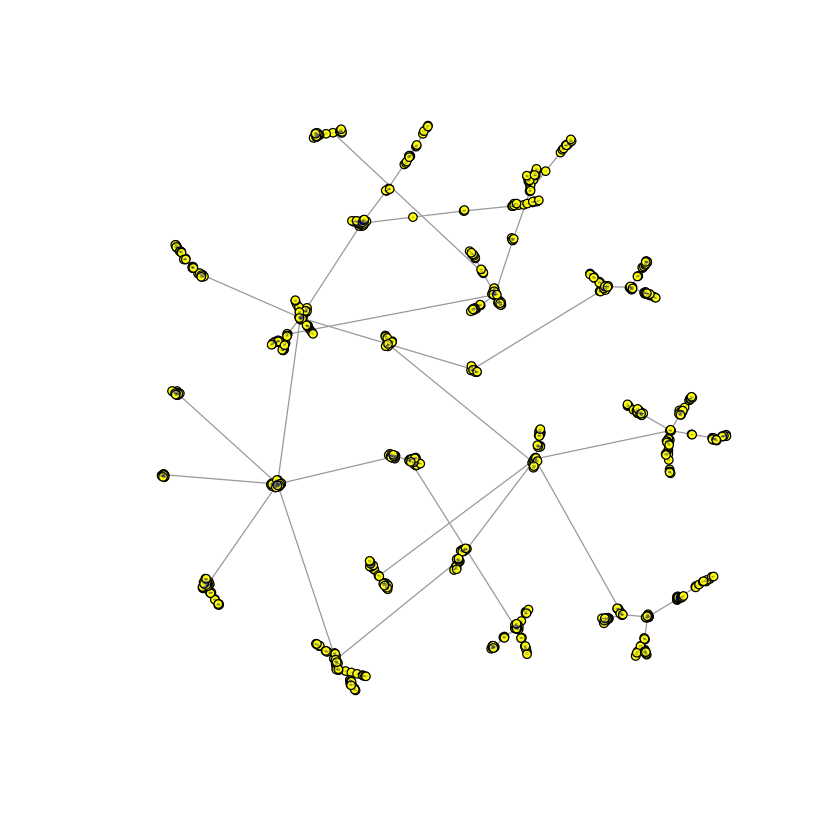

In [294]:
set.seed(0)
b1 = barabasi.game(1000, 1, directed = F)
plot(b1,vertex.size=3, vertex.label.cex=0.1,vertex.color="yellow")

<b>Part 2.2 B</b>

In [295]:
transition_matrix_b1 = create_transition_matrix(b1)

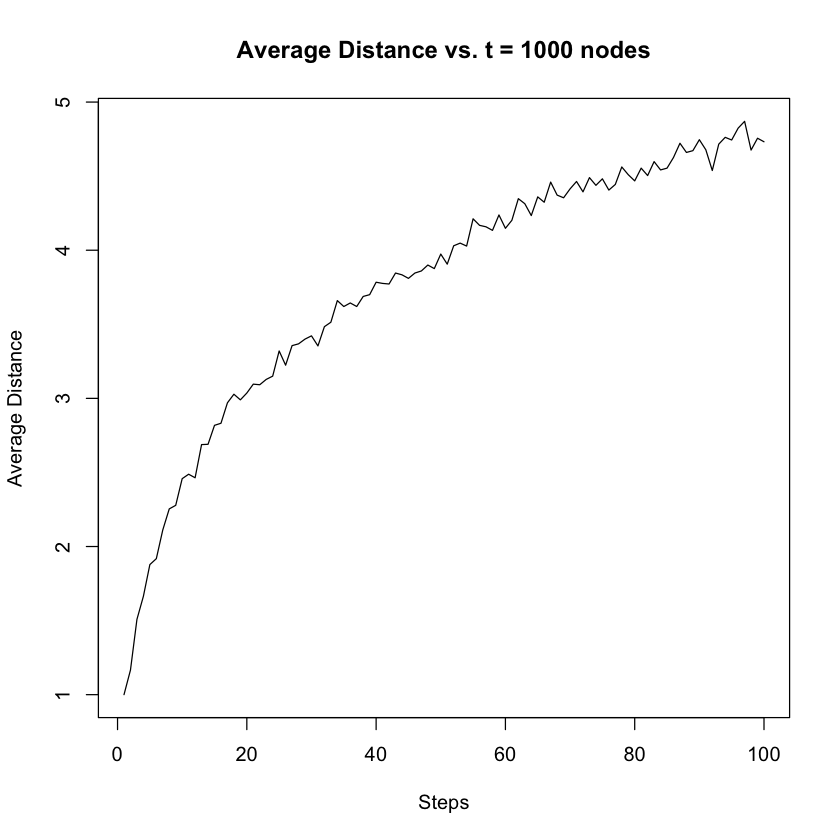

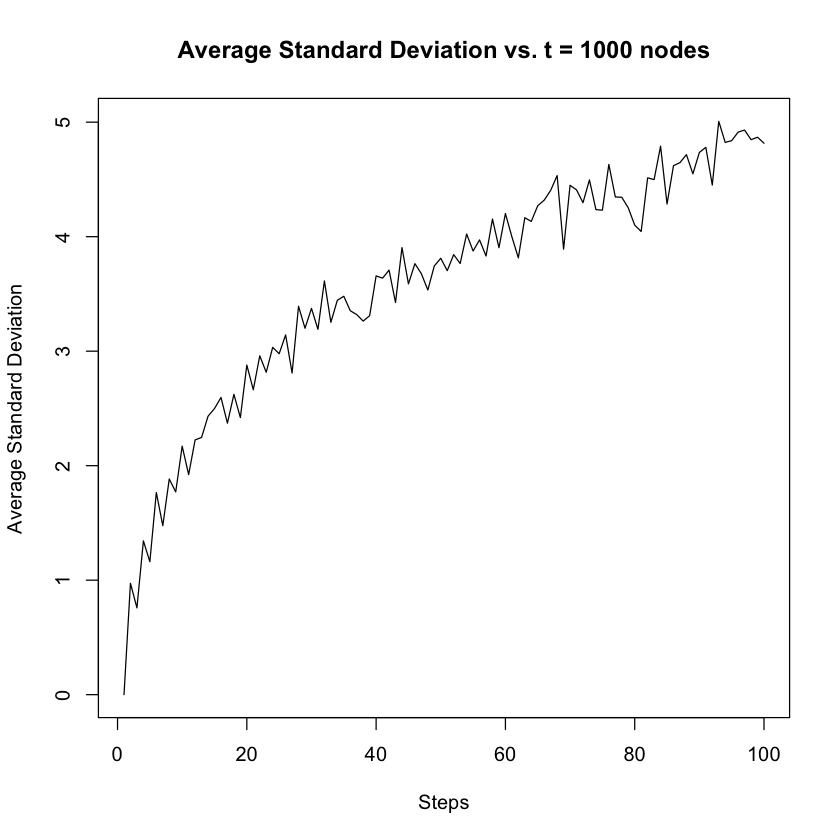

In [296]:
deg_random_walk_end_b1 = random_walk_record(1000, 100, b1, transition_matrix_b1)

<b>Part 2.2 C</b>

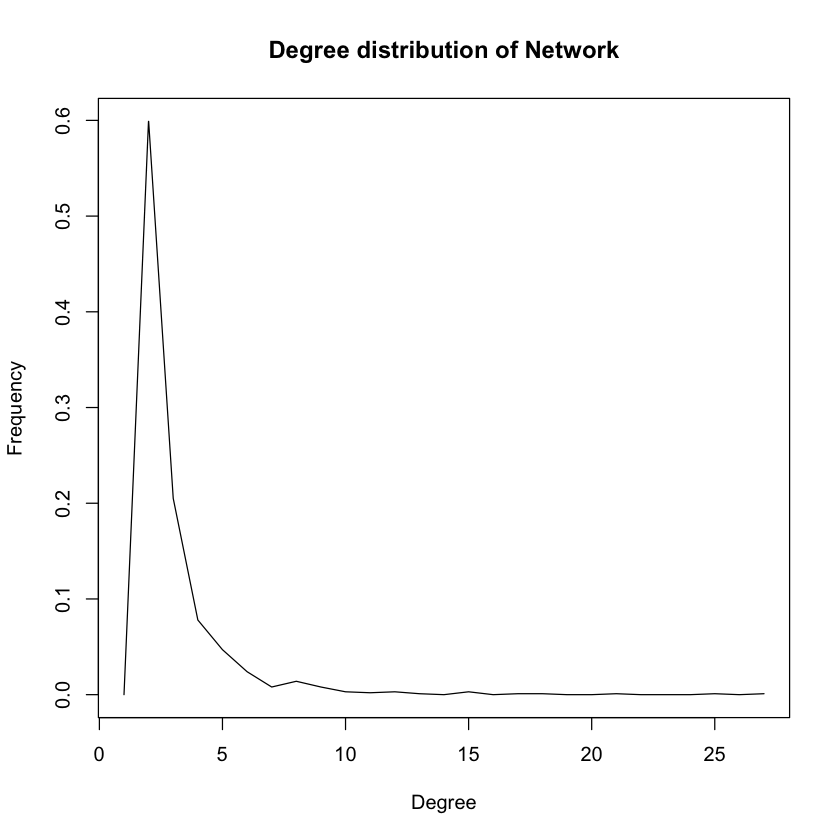

In [298]:
plot(degree.distribution(b1),typ='l',main="Degree distribution of Network",xlab="Degree",ylab="Frequency")

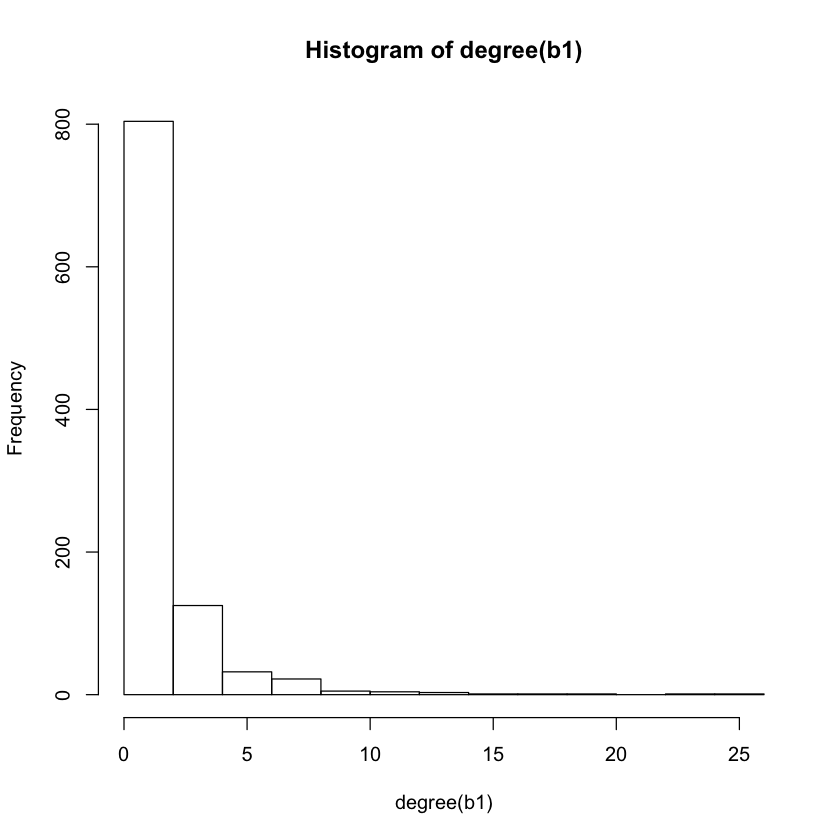

In [287]:
hist(degree(b1))

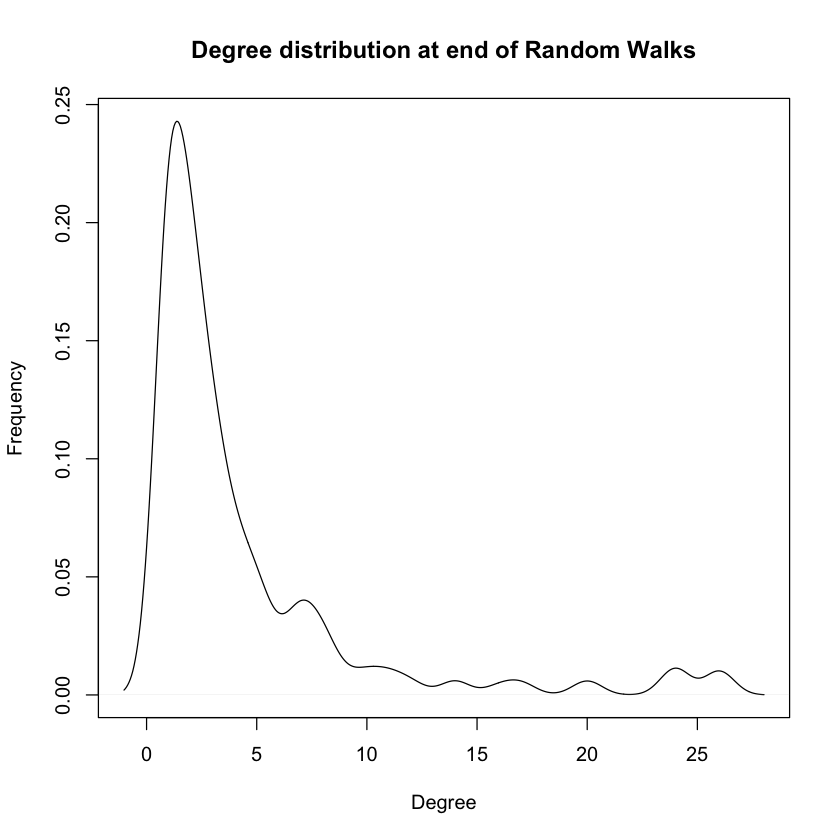

In [301]:
d = density(deg_random_walk_end_b1)
plot(d,main="Degree distribution at end of Random Walks",xlab="Degree",ylab="Frequency")

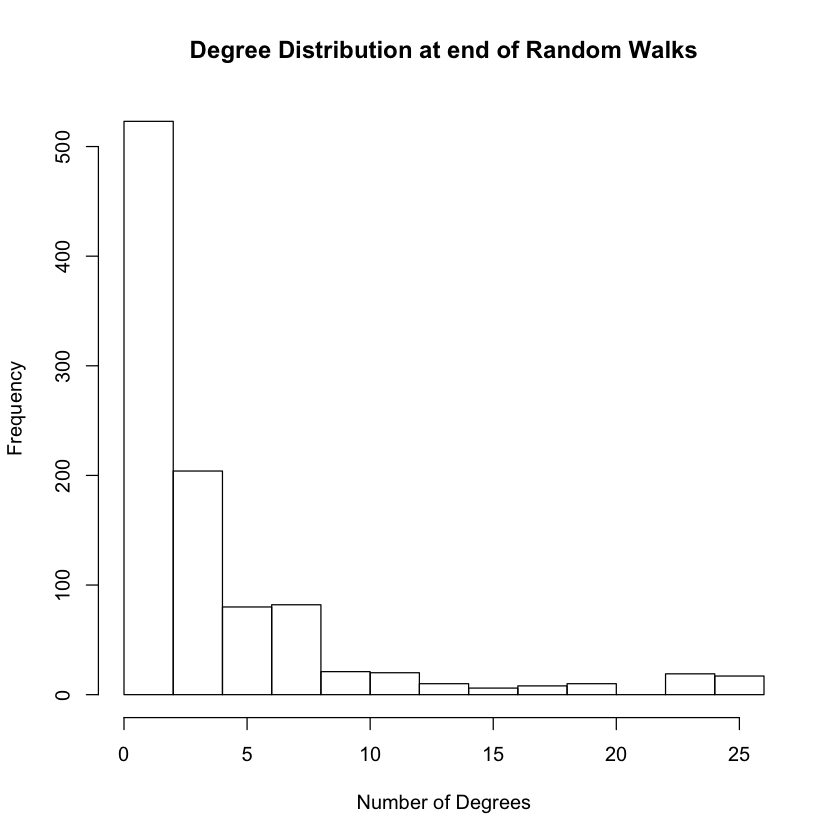

In [302]:
hist(x = deg_random_walk_end_b1, main = "Degree Distribution at end of Random Walks", xlab = "Number of Degrees")

<b>Part 2.2 D</b>

In [315]:
set.seed(0)
b2 = barabasi.game(100, 1, directed = F)

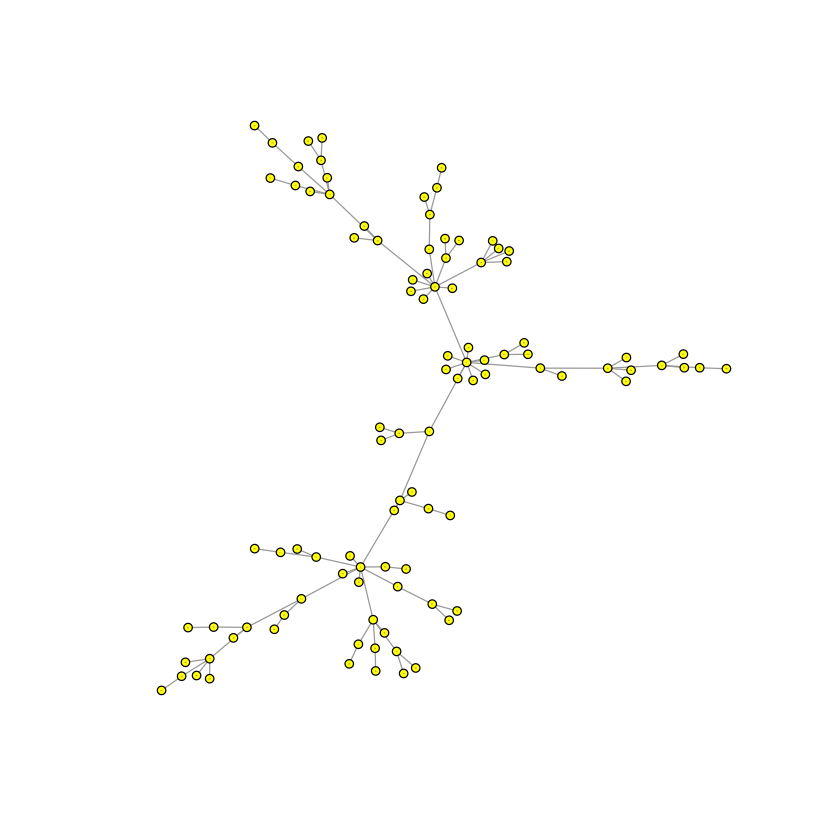

In [316]:
plot(b2,vertex.size=3, vertex.label.cex=0.1,vertex.color="yellow")

In [251]:
transition_matrix_b2 = create_transition_matrix(b2)

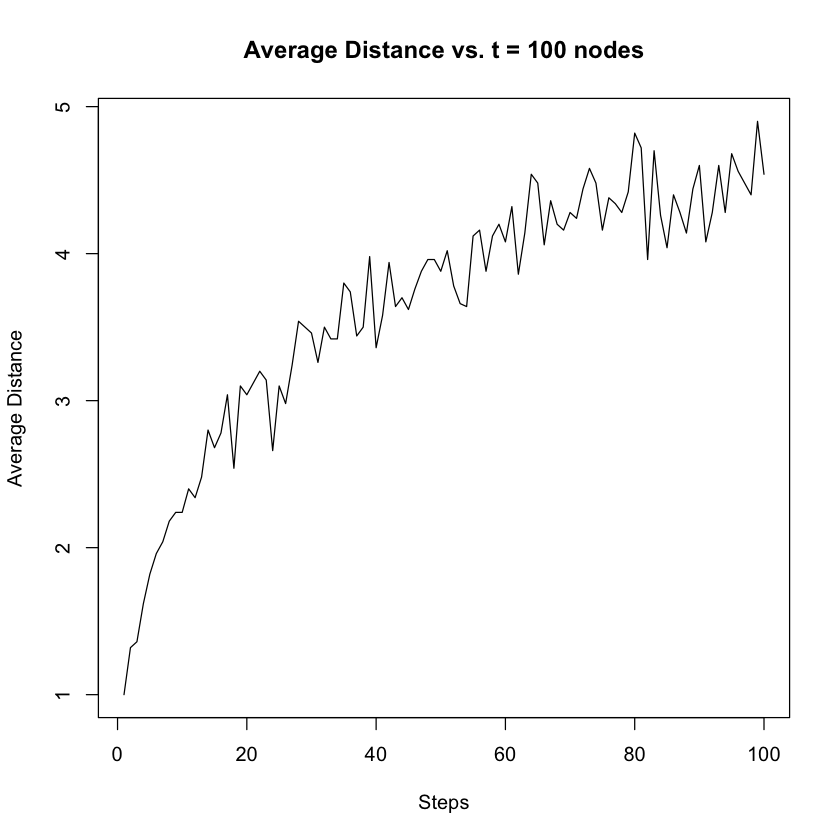

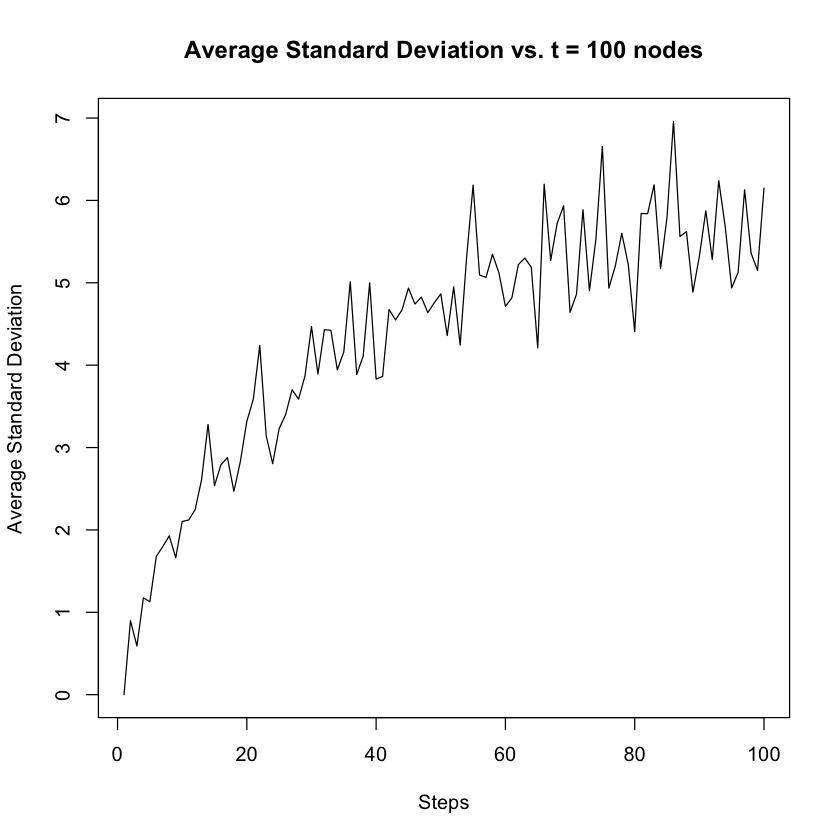

In [252]:
deg_random_walk_end_b2 = random_walk_record(100, 100, b2, transition_matrix_b2)

In [317]:
set.seed(0)
b3 = barabasi.game(10000, 1, directed = F)

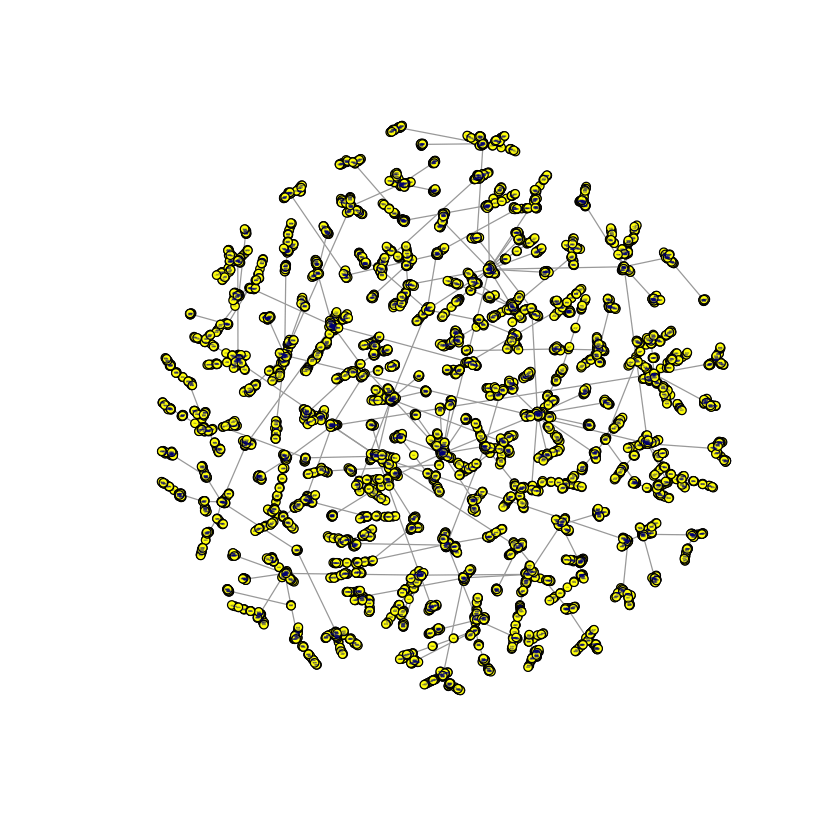

In [320]:
plot(b3,vertex.size=3, vertex.label.cex=0.1,vertex.color="yellow")

In [306]:
transition_matrix_b3 = create_transition_matrix(b3)

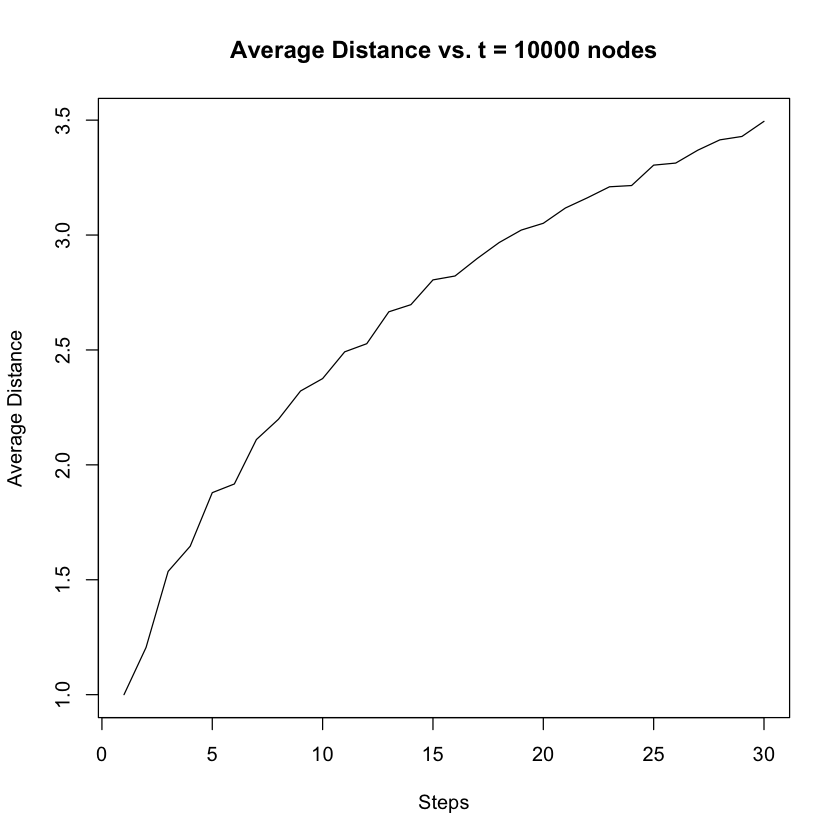

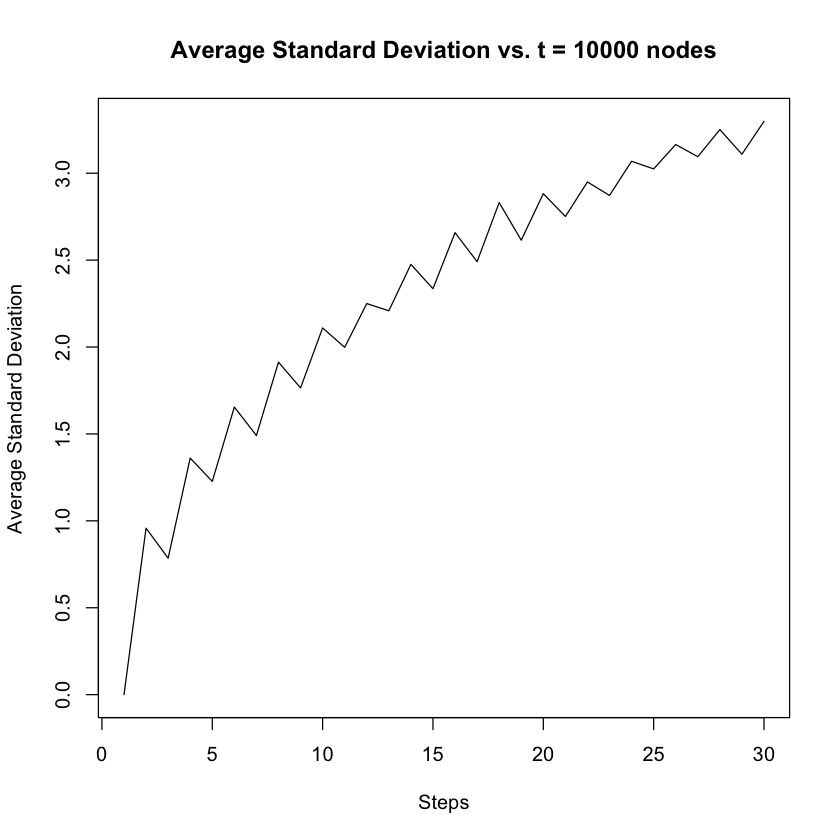

In [308]:
deg_random_walk_end_b3 = random_walk_record(10000, 30, b3, transition_matrix_b3)

In [322]:
diameter(b1)
diameter(b2)
diameter(b3)

[1] 21

[1] 14

[1] 29